In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
# 6만장의 사진이 10개의 클래스로 분할되어있음. 1클래스당 6천장씩

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

# 검증세트
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=.2, random_state=42)

In [2]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
# Conv2D 합성곱 층 # 커널의 수, 커널의 사이즈(3x3)
# 처음 나오는 층 - 입력층의 역할도 함 >> input_shape (28x28, 1) // 1:흑백

model.add(keras.layers.MaxPooling2D(2))  # max풀링.(2x2) # stride=2, padding='valid' 생략
# 28x28을 풀링2하여, 14x14가 됨

In [3]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # (7,7,64)

In [4]:
# 커널 끝난 후엔 완전밀집층(Dense) 들어가야함
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
# 신경망의 정보 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

3x3x32 + 1x32 = 320  
3x3x32x64 + 1x64 = 18496  
7x7x64x100 + 1x100 = 313700  
100x10 + 1x10 = 1010

주피터노트북 종료 후  
[아나콘다 프롬프트 관리자]  
conda install pydot  
conda install graphviz  // 이미 설치되어있음

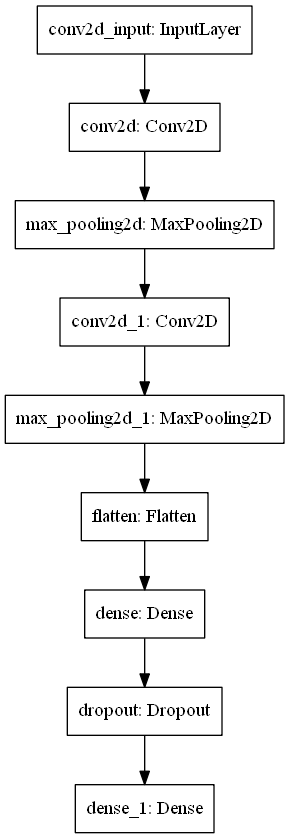

In [6]:
import graphviz
import pydot

keras.utils.plot_model(model)

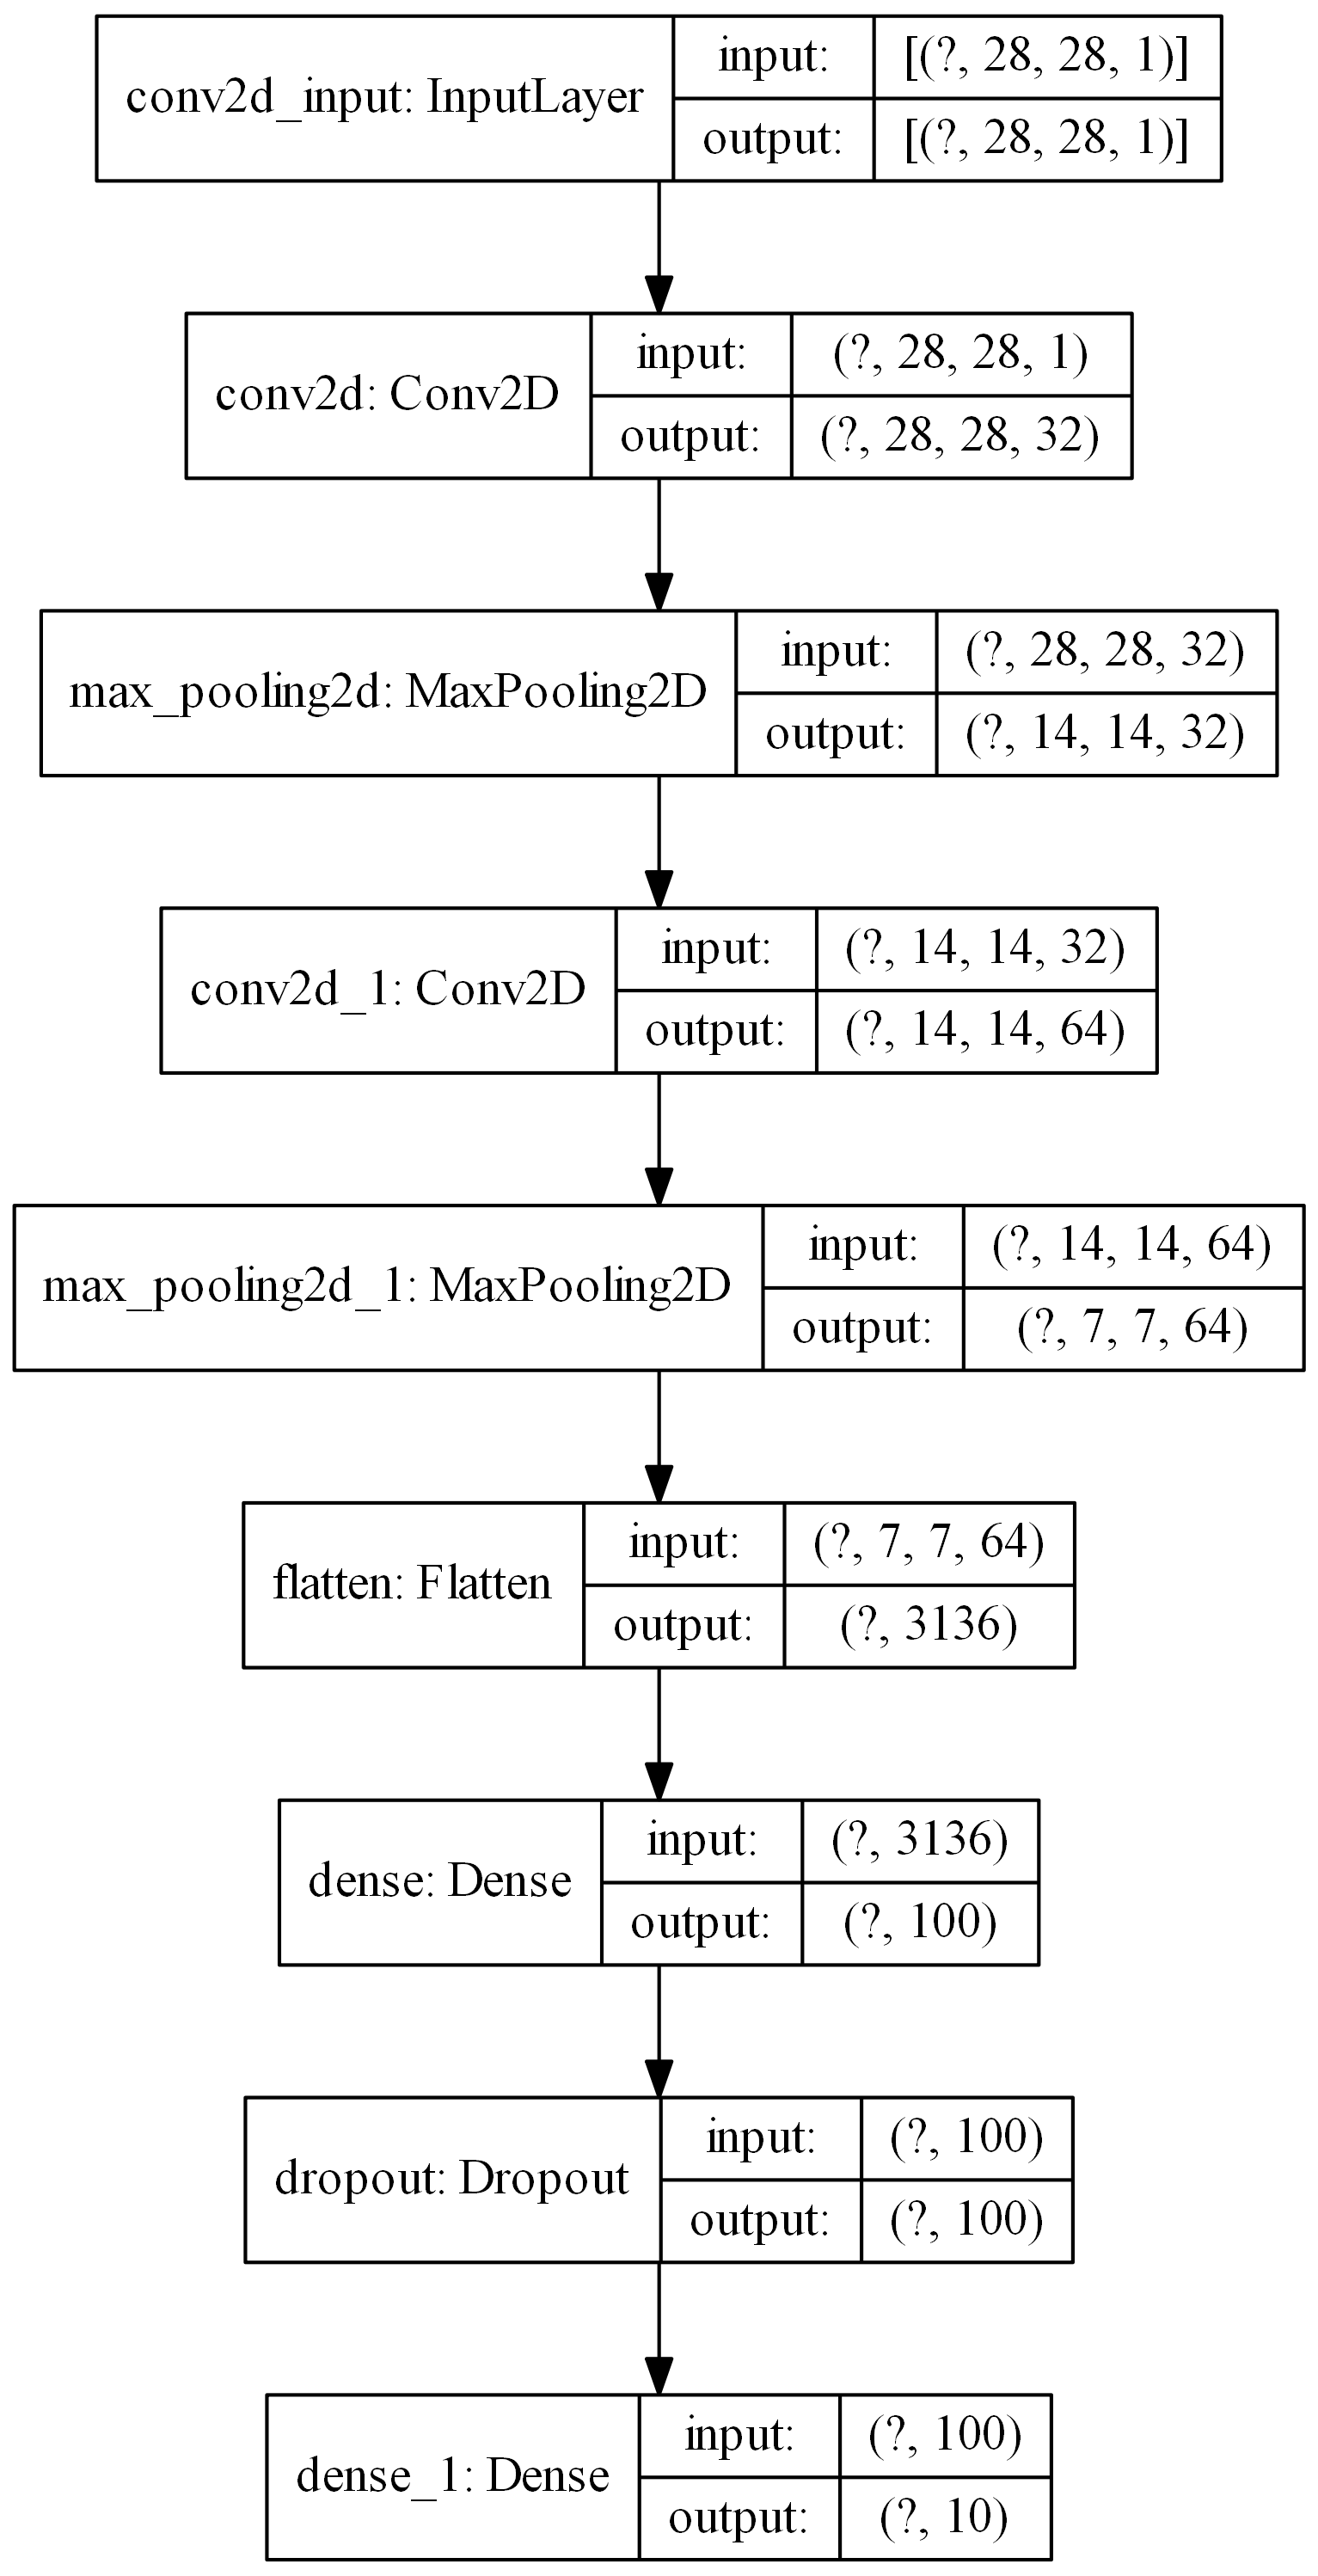

In [7]:
keras.utils.plot_model(model, show_shapes=True,
                       to_file='cnn-architecture.png', dpi=300) # 합성신경망의 구조, 해상도

In [8]:
# 신경망 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 복구점 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')

# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 28s 577us/sample - loss: 0.5139 - accuracy: 0.8152 - val_loss: 0.3452 - val_accuracy: 0.8747
Epoch 2/20
48000/48000 [==============================] - 31s 655us/sample - loss: 0.3459 - accuracy: 0.8763 - val_loss: 0.2796 - val_accuracy: 0.8956
Epoch 3/20
48000/48000 [==============================] - 29s 615us/sample - loss: 0.2984 - accuracy: 0.8916 - val_loss: 0.2638 - val_accuracy: 0.9008
Epoch 4/20
48000/48000 [==============================] - 29s 606us/sample - loss: 0.2662 - accuracy: 0.9020 - val_loss: 0.2412 - val_accuracy: 0.9110
Epoch 5/20
48000/48000 [==============================] - 29s 599us/sample - loss: 0.2448 - accuracy: 0.9111 - val_loss: 0.2310 - val_accuracy: 0.9129
Epoch 6/20
48000/48000 [==============================] - 29s 612us/sample - loss: 0.2209 - accuracy: 0.9175 - val_loss: 0.2468 - val_accuracy: 0.9100
Epoch 7/20
48000/48000 [====================

In [12]:
model.evaluate(val_scaled, val_target, verbose=0)

[0.23100911183158557, 0.91291666]

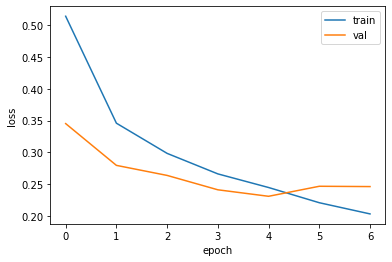

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

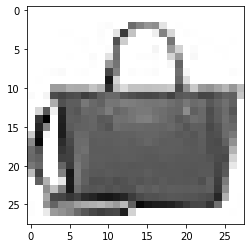

In [21]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [22]:
preds = model.predict(val_scaled[0:1]) # 10개 클래스의 (예측)확률값
print(preds)

[[8.6116331e-12 1.6120092e-16 3.9539890e-12 2.6505481e-10 2.6855383e-14
  2.7963372e-12 1.9101042e-11 2.9085558e-09 1.0000000e+00 8.9012192e-14]]


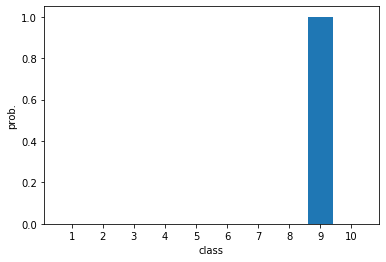

In [28]:
plt.bar(range(1,11), preds[0])
plt.xticks(range(1,11))
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

### 레이블 : 0~9까지의 정수배열, 옷의 클래스를 나타낸다.
- 0 : T-Shirt / top
- 1 : Trouser
- 2 : Pullover
- 3 : Dress
- 4 : Coat
- 5 : Sandal
- 6 : Shirt
- 7 : Sneaker
- 8 : Bag
- 9 : Ankle boots

In [31]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달',
           '셔츠','스니커즈','가방','앵클부츠']

In [32]:
import numpy as np
print(classes[np.argmax(preds)])

가방


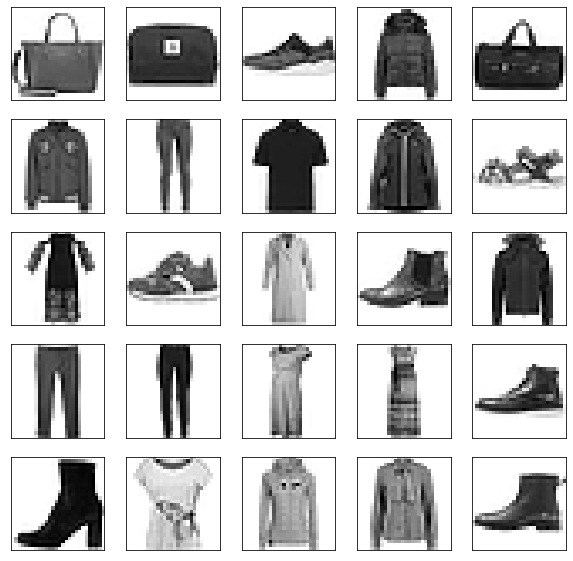

In [68]:
import matplotlib as mpl
mpl.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus=False)

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_scaled[i].reshape(28, 28), cmap='gray_r') 
#    plt.xlabel(classes[train_input_labels[i]])
#    plt.xlabel(classes[i]) 10개밖에 안써놔서 쓸 수 없다..

plt.show()